In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:

list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/14741813010_5d44e33088_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4868595281_1e58083785.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27465811_9477c9d044.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054864058_2edca122a9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6050020905_881295ac72_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3550491463_3eb092054c_m.jpg')]

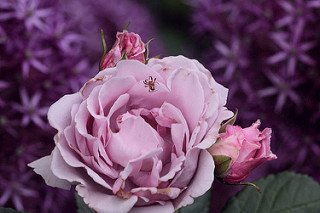

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
class_name = list(flowers_labels_dict.keys())
class_name

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [12]:

img.shape

(284, 320, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
num_classes = 5
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
np.random.seed(1000)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [18]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])
# (5) Train
history = model.fit(X_train_scaled, y_train, epochs=30,validation_split=0.2, shuffle=True)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


69/69 [==============================] - 9s 79ms/step - loss: 2.5757 - acc: 0.3707 - val_loss: 8.1545 - val_acc: 0.3103
Epoch 2/30
69/69 [==============================] - 3s 50ms/step - loss: 1.7154 - acc: 0.4566 - val_loss: 2.6202 - val_acc: 0.3557
Epoch 3/30
69/69 [==============================] - 4s 54ms/step - loss: 1.5200 - acc: 0.4802 - val_loss: 1.2108 - val_acc: 0.5572
Epoch 4/30
69/69 [==============================] - 3s 45ms/step - loss: 1.3387 - acc: 0.5284 - val_loss: 1.6079 - val_acc: 0.4864
Epoch 5/30
69/69 [==============================] - 3s 45ms/step - loss: 1.2453 - acc: 0.5402 - val_loss: 1.3932 - val_acc: 0.5771
Epoch 6/30
69/69 [==============================] - 3s 48ms/step - loss: 1.1160 - acc: 0.5843 - val_loss: 1.3731 - val_acc: 0.4991
Epoch 7/30
69/69 [==============================] - 3s 45ms/step - loss: 1.0660 - acc: 0.6011 - val_loss: 1.5220 - val_acc: 0.5209
Epoch 8/30
69/69 [==============================] - 4s 51ms/step - loss: 1.0293 - acc: 0.6265 

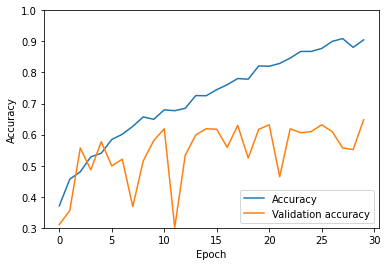

In [19]:
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

In [20]:

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 32ms/step - loss: 1.5488 - acc: 0.6242


[1.5488030910491943, 0.6241829991340637]

In [21]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 15ms/step


array([[8.4875505e-03, 9.8634559e-01, 1.3169647e-03, ..., 6.1035748e-06,
        6.8260379e-06, 7.9984438e-06],
       [6.4336586e-01, 4.2226188e-02, 5.5562286e-04, ..., 1.6546117e-05,
        2.3070781e-05, 1.9677804e-05],
       [2.7024660e-03, 1.8545540e-02, 9.5605695e-01, ..., 5.5012652e-06,
        8.9501436e-06, 8.4557669e-06],
       ...,
       [1.1079700e-02, 9.8063010e-01, 3.8986218e-03, ..., 1.2857914e-05,
        1.2938965e-05, 1.6222244e-05],
       [5.2931762e-01, 1.6212300e-03, 3.4303513e-01, ..., 9.8657765e-06,
        1.4184869e-05, 1.3418748e-05],
       [6.4190784e-03, 1.8003960e-03, 1.3634675e-03, ..., 6.6769971e-06,
        6.5847862e-06, 3.7683433e-06]], dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([0.05394584, 0.14342879, 0.0535604 , 0.05349557, 0.05368599,
       0.05349041, 0.05349023, 0.05349027, 0.05349027, 0.05349014,
       0.05349022, 0.05349043, 0.05349032, 0.05349034, 0.05349024,
       0.05349028, 0.05349034], dtype=float32)>

In [23]:

np.argmax(score)

1

In [25]:
y_test[0]

1